# 2) CNN Using Transfer Learning (VGG16)

## Importing Required Libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np

In [2]:
train_path = 'Railway Track fault Detection Updated/Train'
valid_path = 'Railway Track fault Detection Updated/Validation'
test_path = 'Railway Track fault Detection Updated/Test'


## Preprocessing

In [3]:
img_height, img_width = 224, 224
batch_size = 16

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    valid_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)


Found 299 images belonging to 2 classes.
Found 62 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


## Building Model

In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

In [5]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x) 
model = Model(inputs=base_model.input, outputs=output)

## Compiling and Training Model

In [6]:
model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [7]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40
)

Epoch 1/40


C:\Users\Shubham\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 194s 9s/step - accuracy: 0.5846 - loss: 0.7348 - val_accuracy: 0.6935 - val_loss: 0.5573
Epoch 2/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 181s 8s/step - accuracy: 0.5413 - loss: 0.7855 - val_accuracy: 0.8226 - val_loss: 0.5379
Epoch 3/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 182s 8s/step - accuracy: 0.6698 - loss: 0.6142 - val_accuracy: 0.7581 - val_loss: 0.5377
Epoch 4/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 179s 8s/step - accuracy: 0.6373 - loss: 0.6085 - val_accuracy: 0.8226 - val_loss: 0.4158
Epoch 5/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 180s 8s/step - accuracy: 0.6886 - loss: 0.5823 - val_accuracy: 0.8387 - val_loss: 0.4235
Epoch 6/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 182s 8s/step - accuracy: 0.7522 - loss: 0.5421 - val_accuracy: 0.7742 - val_loss: 0.4438
Epoch 7/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 179s 8s/step - accuracy: 0.6498 - loss: 0.5795 - val_accuracy: 0.8387 - val_loss: 0.4178
Epoch 8/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 178s 8s/step - accuracy: 0.7316 - loss: 0.5230 - val_accuracy: 0.8710 - val_loss: 0.

## Plotting Training and Validation accuracy and Loss

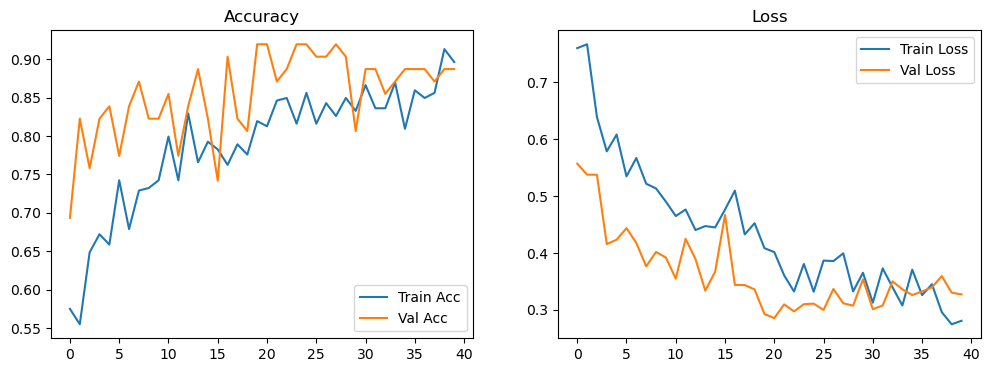

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

## Model Evaluation on Test Data

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

# Classification report
y_pred = (model.predict(test_generator) > 0.5).astype("int32")
y_true = test_generator.classes
print(classification_report(y_true, y_pred, target_names=['Defective', 'Non Defective']))

C:\Users\Shubham\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9286 - loss: 0.3335
Test Accuracy: 0.9090909361839294
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step
               precision    recall  f1-score   support

    Defective       0.91      0.91      0.91        11
Non Defective       0.91      0.91      0.91        11

     accuracy                           0.91        22
    macro avg       0.91      0.91      0.91        22
 weighted avg       0.91      0.91      0.91        22



## Saving the Transfer Learning Model

In [13]:
model.save('my_model_TL.h5')